In [2]:
#Customer Clustering app


In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #used for calculating kmeans score
import matplotlib.pyplot as plt


In [4]:
np.random.seed(42)
data={
    'CustomerID':np.arange(1,101),
    'Age':np.random.randint(18,65,size=100),
    'Average_Spend':np.random.uniform(5,50,size=100),
    'Visits_per_week':np.random.uniform(1,7,size=100),
    'Promotion_intrest':np.random.randint(1,11,size=100),
}

#Converting it into data frame
df=pd.DataFrame(data)
df.head()

,CustomerID,Age,Average_Spend,Visits_per_week,Promotion_intrest
0,1,56,18.206968,5.266897,2
1,2,46,5.633592,5.857006,9
2,3,32,13.947908,3.091996,8
3,4,60,37.010388,1.577059,10
4,5,25,40.557899,6.643140,7


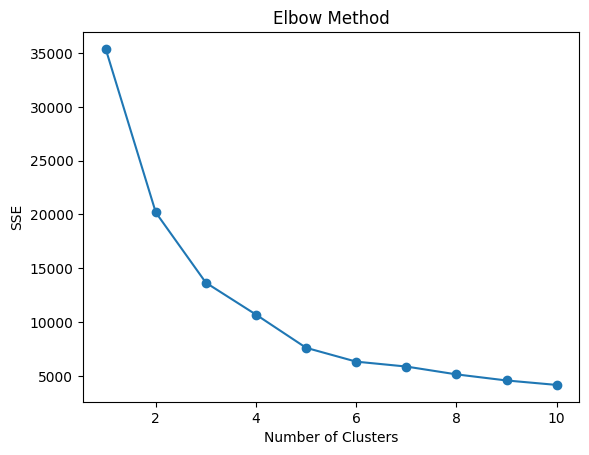

In [5]:
#Applying kmeans clustering
#firstly we define number of clusters(group) using elbow method and wss(within cluster sum of square ) to check how the data points are scattered around the centroid

X=df[['Age','Visits_per_week','Promotion_intrest','Average_Spend']]

sse=[] #defining a empty list
k_range=range(1,11) #loop range from 1 to 10

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
#Inertia_ = Within-Cluster Sum of Squared Errors (WSS)
# Lower is better → tighter clusters

#plotting the elbow curve
plt.plot(k_range,sse,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

#we take the cluster from graph where the graph starts decreasing ,but not sharply


In [11]:
features=df[['Age','Visits_per_week','Promotion_intrest','Average_Spend']]
kmeans=KMeans(n_clusters=3,random_state=42)
df['Cluster']=kmeans.fit_predict(features)
cluster_names={0:'Daily',1:'Promotion',2:'Weekend'}
df['Cluster Group']=df['Cluster'].map(cluster_names)

In [12]:
df

,CustomerID,Age,Average_Spend,Visits_per_week,Promotion_intrest,Cluster,Cluster Group
0,1,56,18.206968,5.266897,2,2,Weekend
1,2,46,5.633592,5.857006,9,2,Weekend
2,3,32,13.947908,3.091996,8,2,Weekend
3,4,60,37.010388,1.577059,10,0,Daily
4,5,25,40.557899,6.643140,7,1,Promotion
...,...,...,...,...,...,...,...
95,96,24,27.868945,1.819728,10,1,Promotion
96,97,26,36.311576,5.253466,10,1,Promotion
97,98,41,43.626146,4.316920,3,0,Daily
98,99,18,19.668151,2.779061,10,1,Promotion


Text(0.5, 1.0, 'Customer Cluster Based on Average Spend')

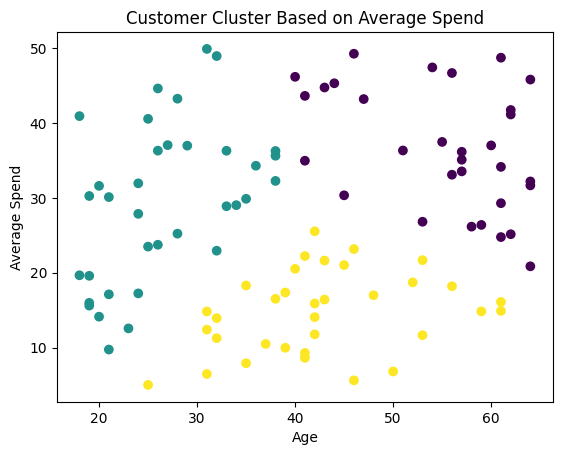

In [18]:
plt.scatter(df['Age'],df['Average_Spend'],c=df['Cluster'],cmap='viridis',marker='o')
plt.xlabel('Age')
plt.ylabel('Average Spend')
plt.title('Customer Cluster Based on Average Spend')

In [19]:
#Evaluating the cluster performance
print(silhouette_score(features,df['Cluster']))

0.36846369703368004


In [20]:
import pickle
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

In [21]:
kmeas=pickle.load(open('kmeans.pkl', 'rb'))

In [27]:
#Predict the cluster of a new Customer
def clustering(age,avg_spend,visit_per_week,promotion_intrest):
    new_customer=np.array([[age,avg_spend,visit_per_week,promotion_intrest]])
    predicted_cluster=kmeans.predict(new_customer)

    if predicted_cluster==0:
        return 'Daily'
    elif predicted_cluster==1:
        return 'Weekend'
    else:
        return 'Promotion'


In [28]:
#new customer
age=41
avg_spend=30
visit_per_week=4
promotion_intrest=7

predicted_result=clustering(age,avg_spend,visit_per_week,promotion_intrest)

print(f'New Customer Assigned to cluster: {predicted_result}')

New Customer Assigned to cluster: Promotion


C:\Users\risha\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
